In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [169]:
df = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
df.shape

(319795, 18)

In [170]:
df = df.drop_duplicates()
df.shape

(301717, 18)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [172]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


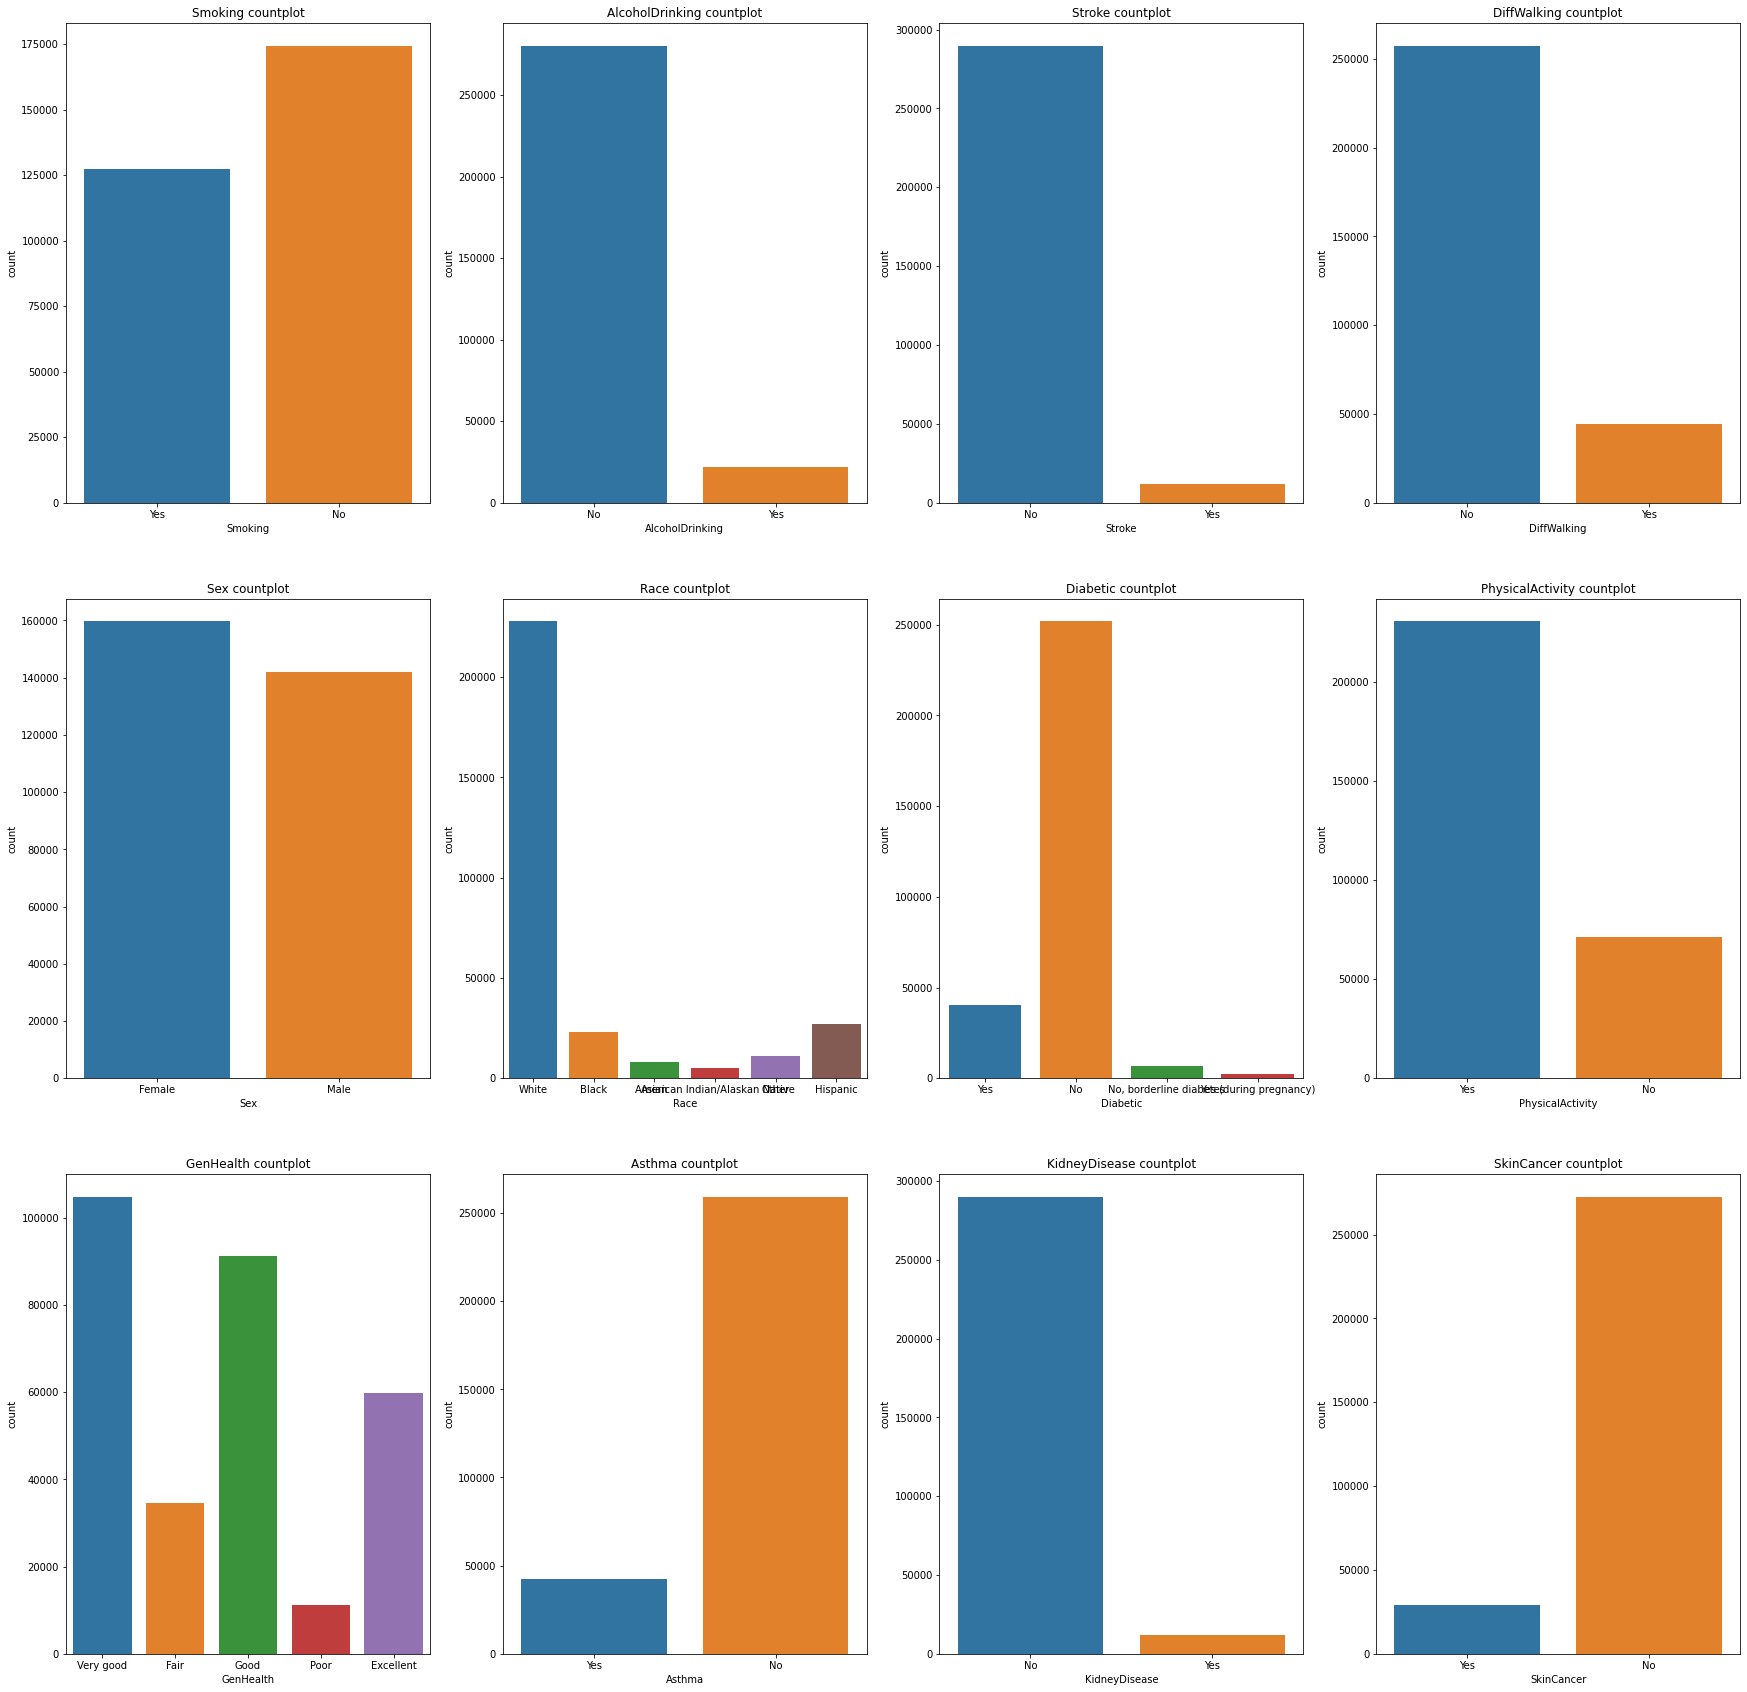

In [173]:
discrete_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 30))
for i in range(3):
    for j in range(4):
        sns.countplot(x = discrete_columns[4 * i + j], data = df, ax = axes[i][j])
        axes[i][j].set_title(discrete_columns[4 * i + j] + " countplot")

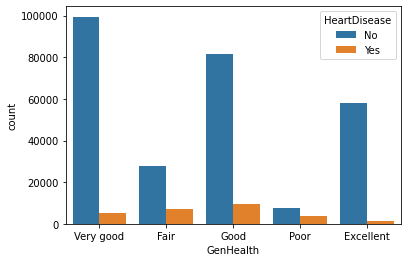

In [174]:
sns.countplot(x = "GenHealth", hue = "HeartDisease", data = df)

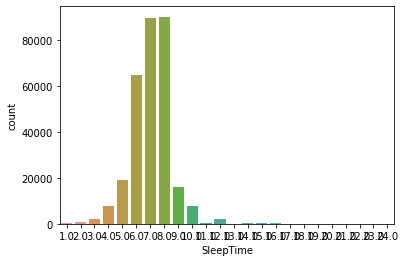

In [175]:
sns.countplot(x = "SleepTime", data = df)

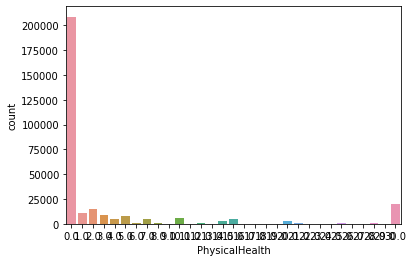

In [176]:
sns.countplot(x = "PhysicalHealth", data = df)

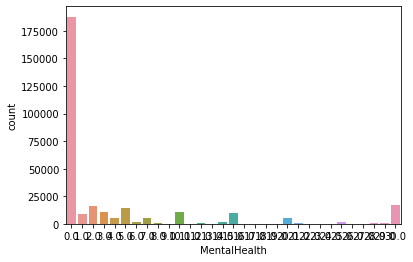

In [177]:
sns.countplot(x = "MentalHealth", data =df)

In [178]:
def proportion_matrix(data, group, value, hue):

    occupation_counts = df.groupby(group)[value].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
    splot = sns.barplot(x = group, y = 'percentage', hue = hue, data = occupation_counts)
    splot.set_title(group + '- percentage')

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
        
    return splot

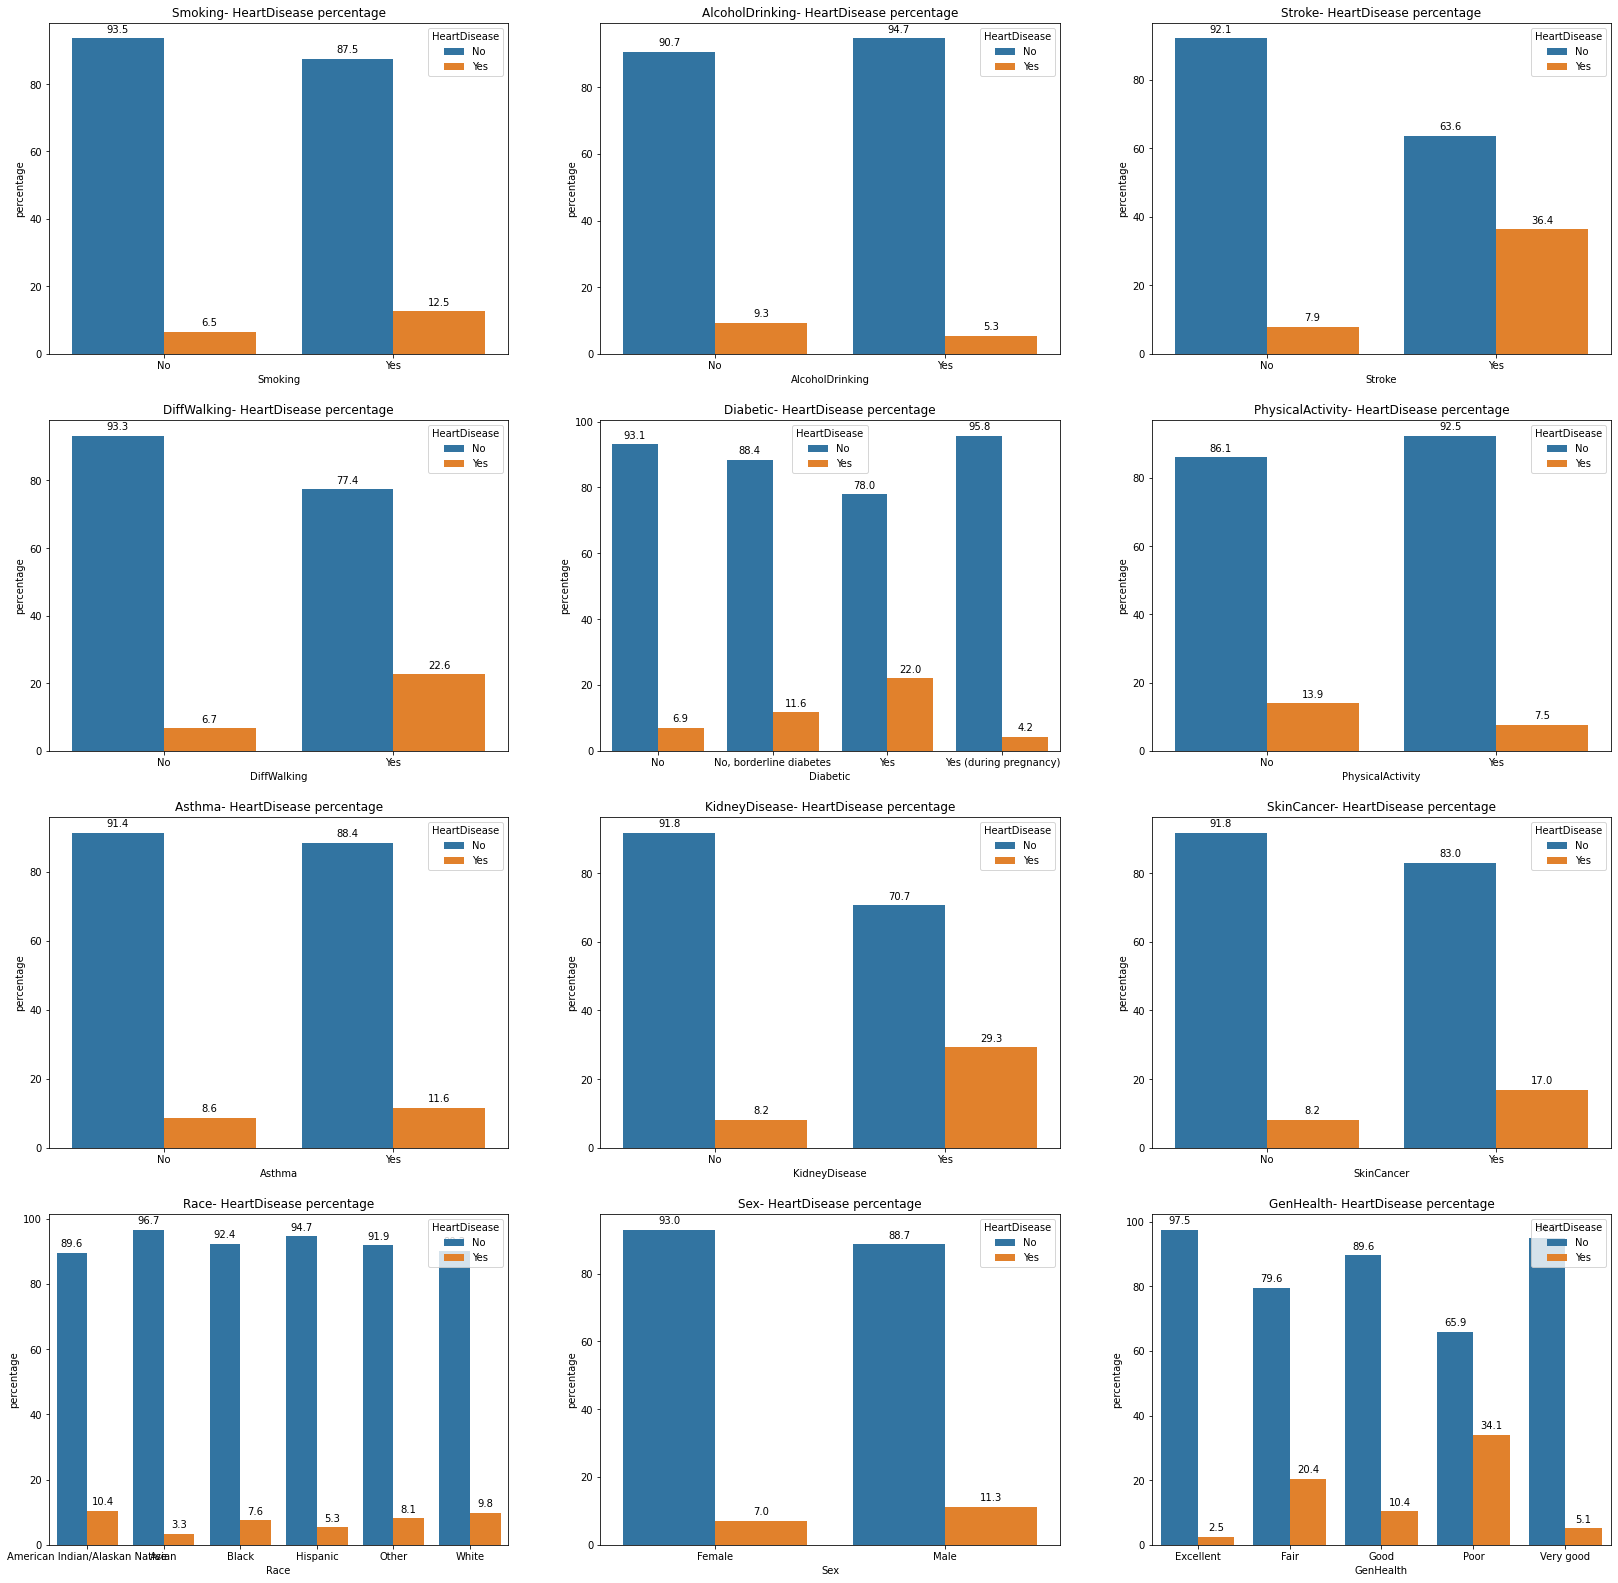

In [179]:
columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race', 'Sex', 'GenHealth']
fig, axes = plt.subplots(nrows= 4, ncols = 3, figsize = (28, 28))
for i in range(4):
    for j in range(3):
        occupation_counts = df.groupby(columns[3 * i + j])['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(x = columns[3 * i + j], y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[i][j])
        axes[i][j].set_title(columns[3 * i + j] + '- HeartDisease percentage')

        for p in axes[i][j].patches:
            axes[i][j].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

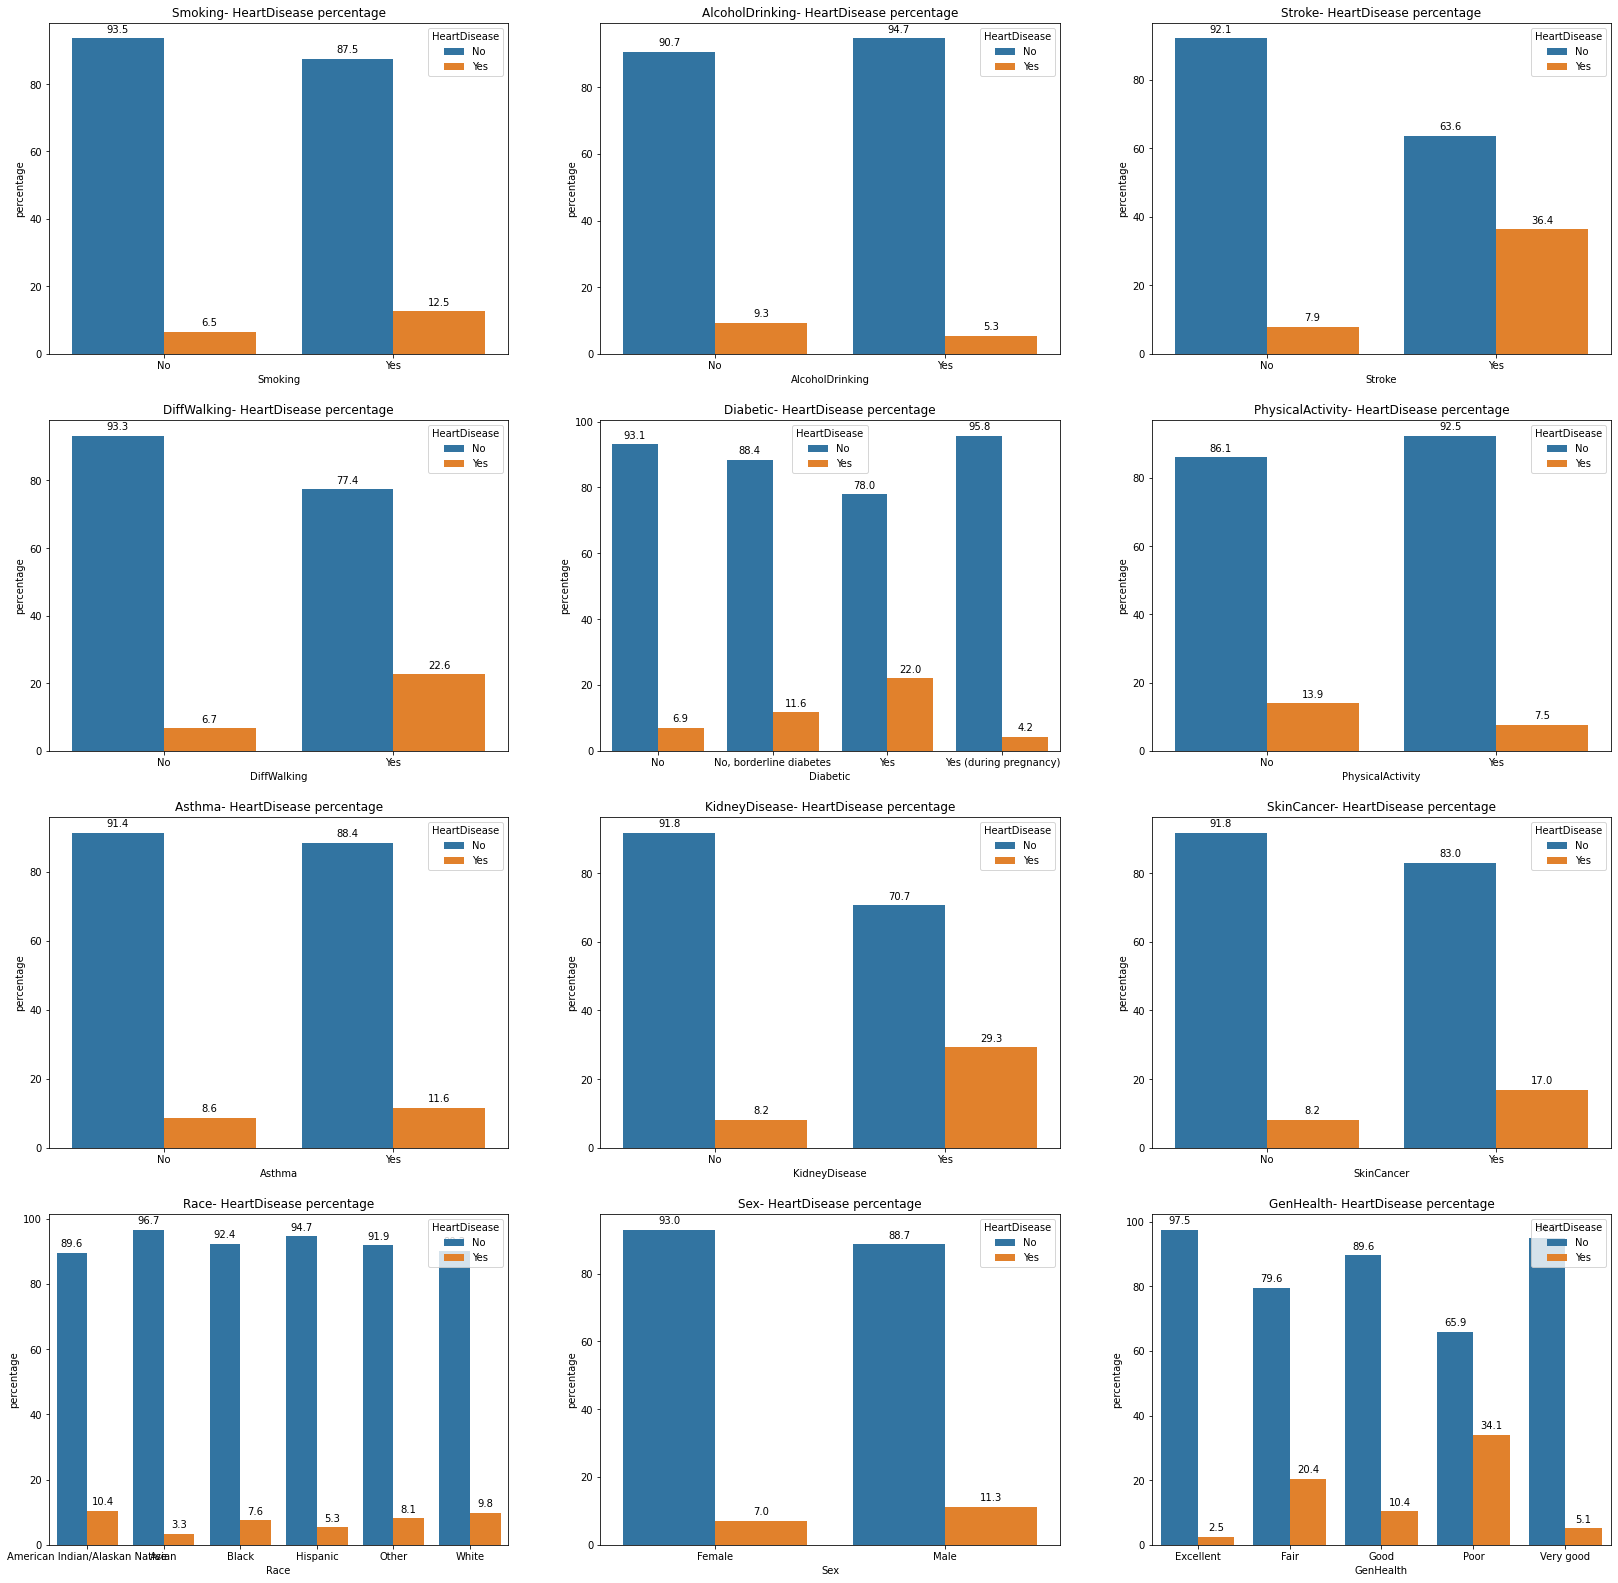

In [180]:
columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race', 'Sex', 'GenHealth']
fig, axes = plt.subplots(nrows= 4, ncols = 3, figsize = (28, 28))
for i in range(4):
    for j in range(3):
        occupation_counts = df.groupby(columns[3 * i + j])['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(x = columns[3 * i + j], y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[i][j])
        axes[i][j].set_title(columns[3 * i + j] + '- HeartDisease percentage')

        for p in axes[i][j].patches:
            axes[i][j].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

In [181]:
df['SleepTime'].value_counts()

8.0     90202
7.0     89445
6.0     64655
5.0     19101
9.0     15853
10.0     7782
4.0      7730
12.0     2204
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [182]:
df['SleepTime'].describe()

count    301717.000000
mean          7.084559
std           1.467122
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

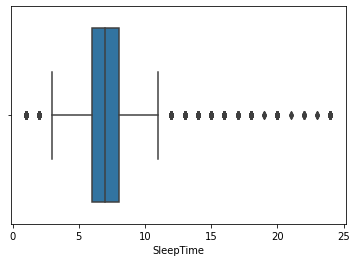

In [183]:
sns.boxplot(x = df['SleepTime'])

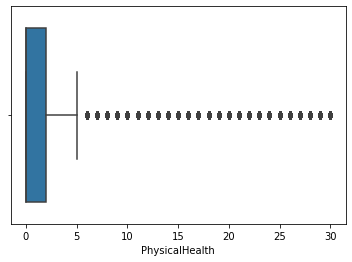

In [184]:
sns.boxplot(x = df['PhysicalHealth'])

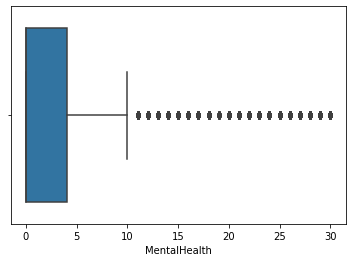

In [185]:
sns.boxplot(x = df['MentalHealth'])

In [186]:
df['MentalHealth'].value_counts()

0.0     187898
30.0     17351
2.0      16309
5.0      14004
10.0     10459
3.0      10412
15.0      9871
1.0       9235
7.0       5516
20.0      5426
4.0       5364
14.0      2048
25.0      1953
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64

In [187]:
df['PhysicalHealth'].value_counts()

0.0     208611
30.0     19503
2.0      14846
1.0      10459
3.0       8608
5.0       7590
10.0      5450
15.0      5012
7.0       4629
4.0       4467
20.0      3216
14.0      2892
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64

In [188]:
df['SleepTime'].value_counts()

8.0     90202
7.0     89445
6.0     64655
5.0     19101
9.0     15853
10.0     7782
4.0      7730
12.0     2204
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

Text(0.5, 1.0, 'AgeCategory - Diabetic percentage')

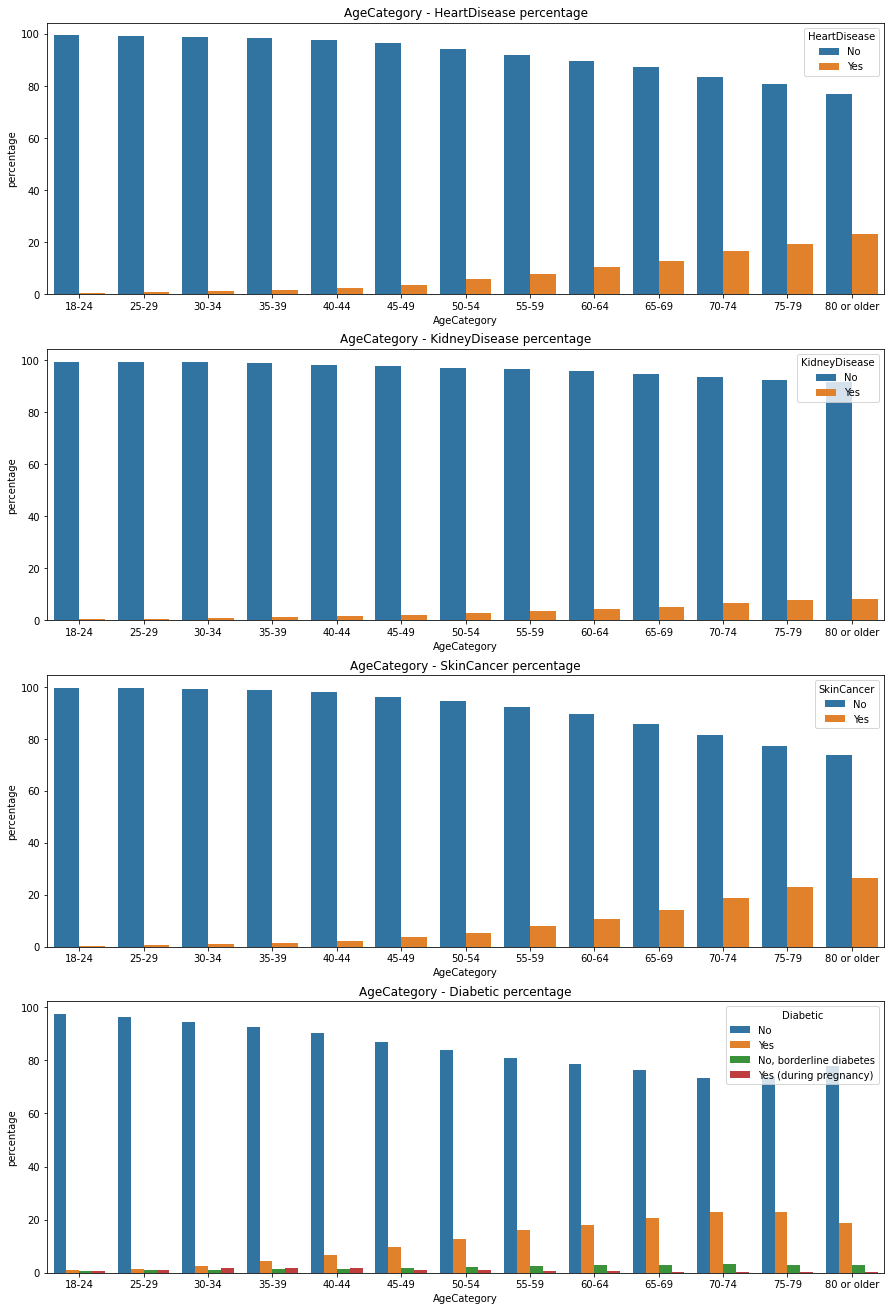

In [190]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 23))
occupation_counts = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[0])
axes[0].set_title('AgeCategory ' + '- HeartDisease percentage')

occupation_counts = df.groupby('AgeCategory')['KidneyDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'KidneyDisease', data = occupation_counts, ax = axes[1])
axes[1].set_title('AgeCategory ' + '- KidneyDisease percentage')

occupation_counts = df.groupby('AgeCategory')['SkinCancer'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'SkinCancer', data = occupation_counts, ax = axes[2])
axes[2].set_title('AgeCategory ' + '- SkinCancer percentage')

occupation_counts = df.groupby('AgeCategory')['Diabetic'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'Diabetic', data = occupation_counts, ax = axes[3])
axes[3].set_title('AgeCategory ' + '- Diabetic percentage')

Text(0.5, 1.0, 'PhysicalHealth - HeartDisease percentage')

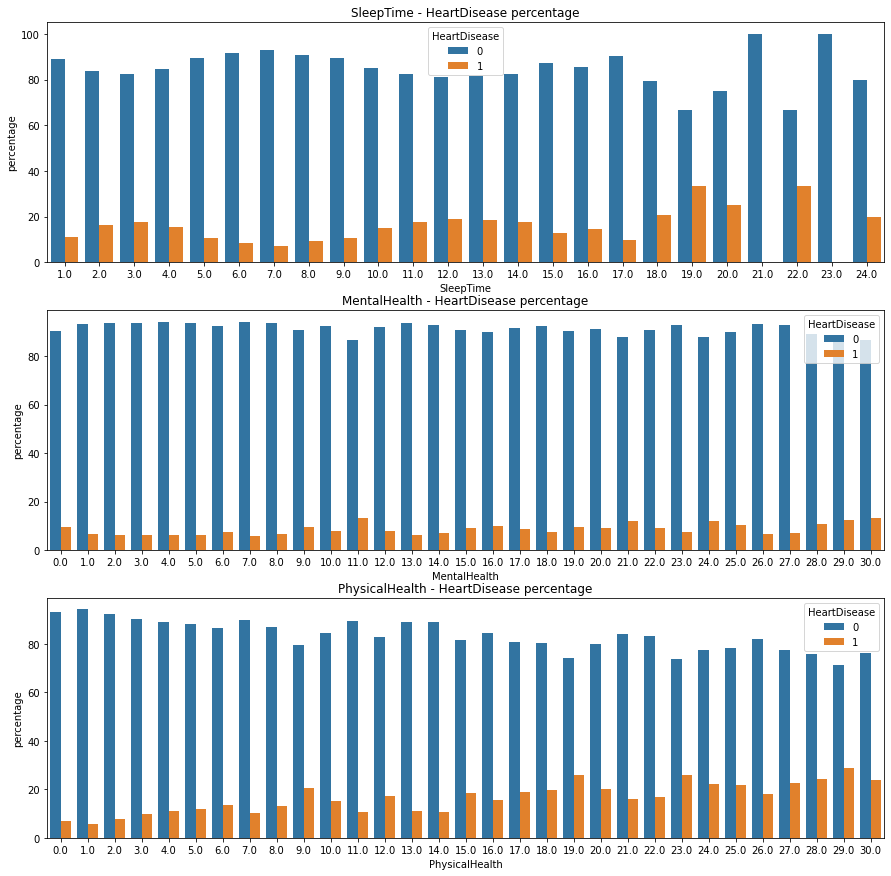

In [124]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 15))
occupation_counts = df.groupby('SleepTime')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'SleepTime', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[0])
axes[0].set_title('SleepTime ' + '- HeartDisease percentage')

occupation_counts = df.groupby('MentalHealth')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'MentalHealth', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[1])
axes[1].set_title('MentalHealth ' + '- HeartDisease percentage')

occupation_counts = df.groupby('PhysicalHealth')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'PhysicalHealth', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[2])
axes[2].set_title('PhysicalHealth ' + '- HeartDisease percentage')

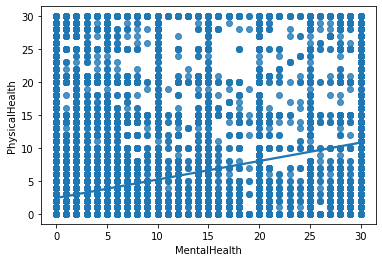

In [93]:
sns.regplot(x = df['MentalHealth'], y = df['PhysicalHealth'])

Text(0.5, 1.0, 'AgeCategory - HeartDisease percentage')

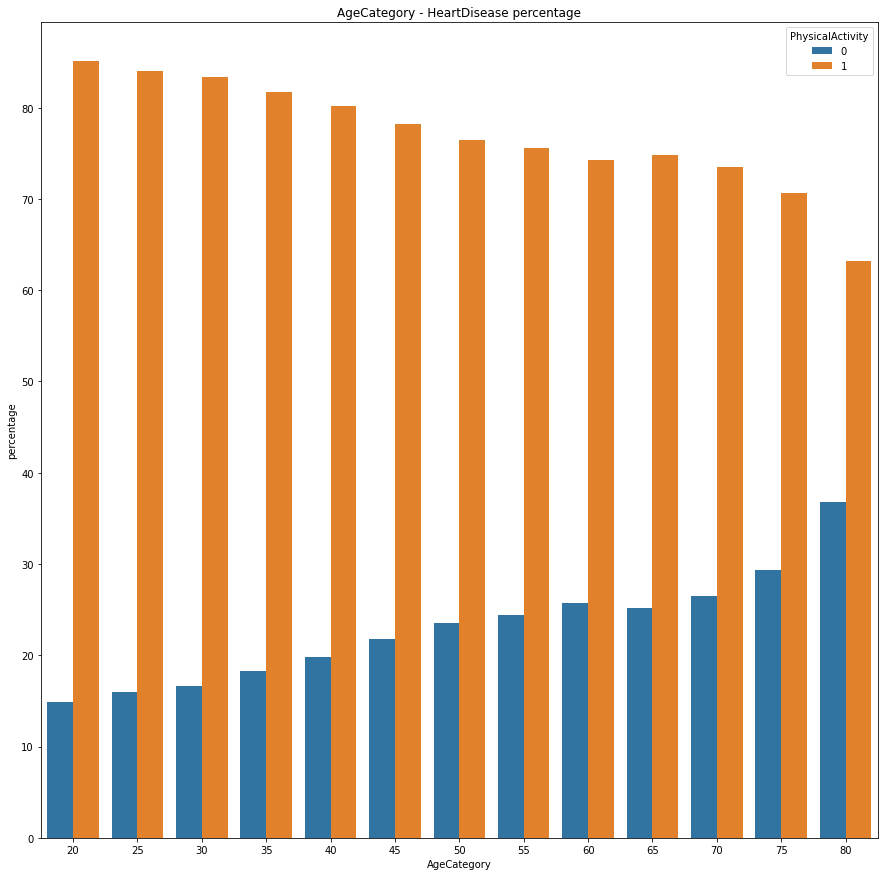

In [125]:
plt.figure(figsize = (15, 15))
occupation_counts = df.groupby('AgeCategory')['PhysicalActivity'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'PhysicalActivity', data = occupation_counts)
plt.title('AgeCategory ' + '- HeartDisease percentage')

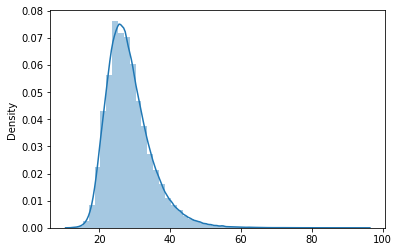

In [25]:
sns.distplot(x = df['BMI'])

In [26]:
df['BMI'].describe()

count    301717.000000
mean         28.441970
std           6.468134
min          12.020000
25%          24.030000
50%          27.410000
75%          31.650000
max          94.850000
Name: BMI, dtype: float64

In [27]:
df.sort_values(by = 'BMI', ascending= False)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
126896,No,94.85,No,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Excellent,7.0,No,No,No
242834,No,94.66,No,No,No,4.0,0.0,No,Female,50-54,White,No,No,Very good,6.0,No,No,No
104267,No,93.97,Yes,No,No,20.0,25.0,Yes,Female,50-54,White,No,No,Poor,6.0,No,No,No
249715,No,93.86,Yes,Yes,No,30.0,30.0,Yes,Female,65-69,Other,Yes,No,Poor,4.0,Yes,Yes,No
156093,No,92.53,Yes,No,No,7.0,0.0,Yes,Female,65-69,Black,Yes,Yes,Poor,8.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81754,No,12.16,No,No,No,0.0,0.0,No,Male,35-39,Black,No,Yes,Very good,8.0,No,No,No
51637,No,12.13,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Excellent,7.0,No,No,No
113373,No,12.08,Yes,No,No,0.0,0.0,Yes,Male,30-34,White,No,Yes,Good,8.0,No,No,No
69662,No,12.02,Yes,No,No,0.0,30.0,No,Male,18-24,White,No,Yes,Good,8.0,No,No,No


In [28]:
df[df['HeartDisease'] == 'Yes'].sort_values(by = 'BMI', ascending = False)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
201173,Yes,83.33,No,No,Yes,0.0,0.0,No,Male,18-24,Asian,No,No,Excellent,10.0,Yes,No,No
9499,Yes,83.00,Yes,Yes,Yes,30.0,30.0,Yes,Male,50-54,Asian,No,No,Poor,18.0,Yes,Yes,No
242246,Yes,80.15,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Good,7.0,No,No,No
18927,Yes,79.10,No,No,No,30.0,30.0,Yes,Female,70-74,Black,No,No,Poor,3.0,No,No,No
250984,Yes,77.73,Yes,No,No,5.0,30.0,Yes,Female,55-59,White,Yes,No,Good,6.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277723,Yes,12.84,Yes,No,No,28.0,0.0,Yes,Male,75-79,White,Yes,Yes,Good,1.0,No,No,No
29718,Yes,12.48,No,No,No,0.0,0.0,No,Female,65-69,White,No,No,Good,11.0,Yes,No,No
1688,Yes,12.48,Yes,No,Yes,12.0,2.0,No,Male,50-54,Black,No,No,Fair,12.0,No,Yes,No
11767,Yes,12.40,No,No,No,0.0,30.0,Yes,Female,40-44,White,No,No,Good,8.0,No,No,No


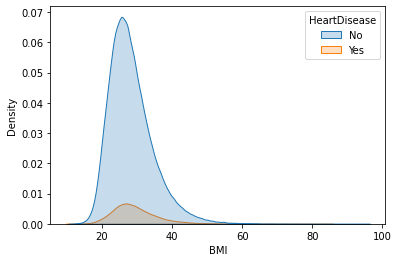

In [31]:
sns.kdeplot(x = df['BMI'], hue = df['HeartDisease'], shade = True)

In [32]:
np.corrcoef(df['PhysicalHealth'], df['MentalHealth'])

array([[1.        , 0.27965749],
       [0.27965749, 1.        ]])

In [116]:
df['Diabetic']

0         Yes
1          No
2         Yes
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: Diabetic, Length: 301717, dtype: object

In [117]:
def yesno_tolabel(x):
    if (x == 'Yes') | (x == 'Yes (during pregnancy)') :
        return 1
    else:
        return 0

In [126]:
df['Diabetic'].value_counts()

0    258572
1     43145
Name: Diabetic, dtype: int64

In [119]:
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
sex_map = {'Female' : 0, 'Male' : 1}
health_map = {'Excellent' : 2, 'Very good' : 2, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}
for column in columns:
    df[column] = df[column].apply(lambda x : yesno_tolabel(x))

df['Sex'] = df['Sex'].map(sex_map)
df['GenHealth'] = df['GenHealth'].map(health_map)

In [121]:
age_map = {'18-24' : 20, '25-29' : 25, '30-34' : 30, '35-39' : 35, '40-44' : 40, '45-49' : 45, '50-54' : 50, '55-59' : 55, '60-64' : 60, '65-69' : 65, '70-74' : 70, '75-79' : 75, '80 or older' : 80}
df['AgeCategory'] = df['AgeCategory'].map(age_map)

In [144]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,2,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,2,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,2,8.0,0,0,0


Text(0.5, 1.0, 'AgeCategory - percentage')

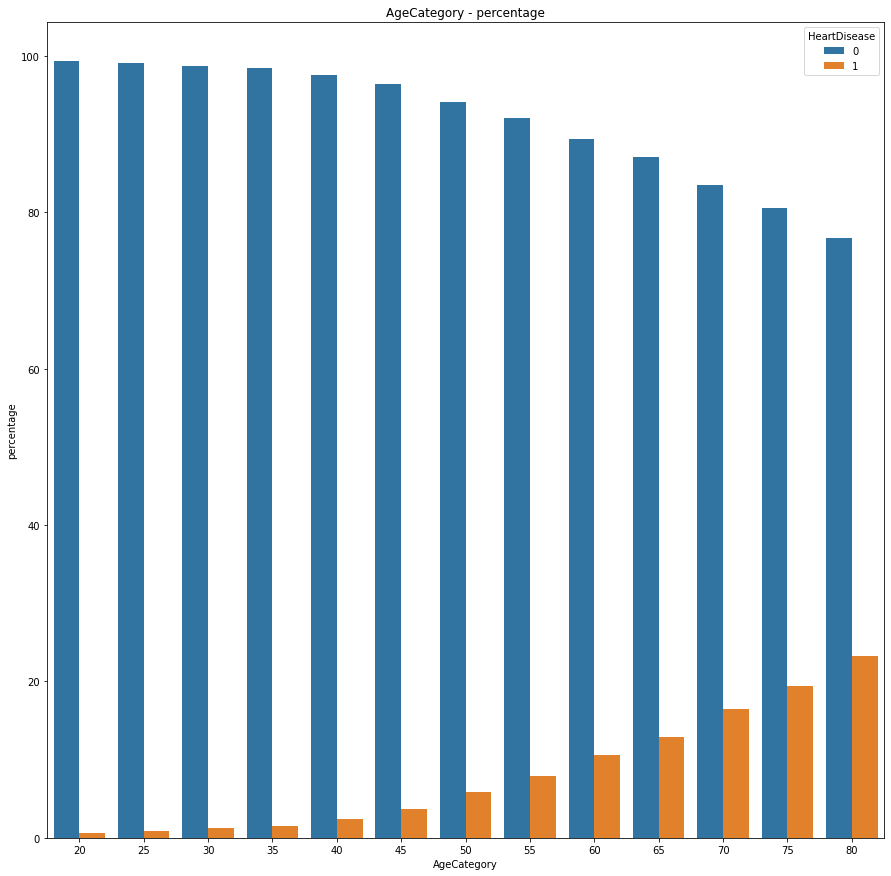

In [122]:
plt.figure(figsize = (15, 15))
occupation_counts = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'HeartDisease', data = occupation_counts)
plt.title('AgeCategory ' + '- percentage')

In [100]:
df['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

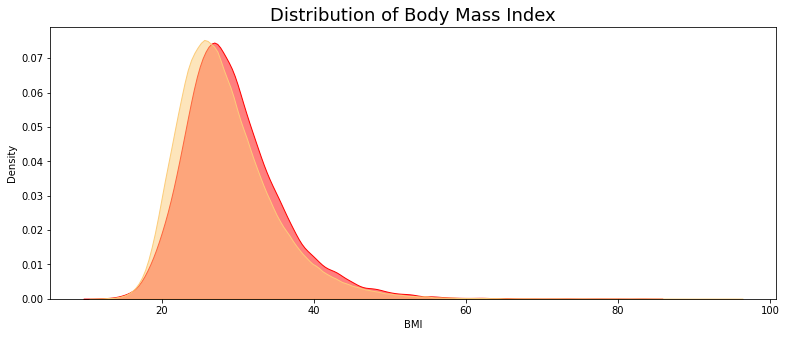

In [37]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
plt.show()

In [38]:
df[df['HeartDisease'] == 1]['BMI'].mean()

29.411892813909887

In [39]:
df[df['HeartDisease'] == 0]['BMI'].mean()

28.34563022852405

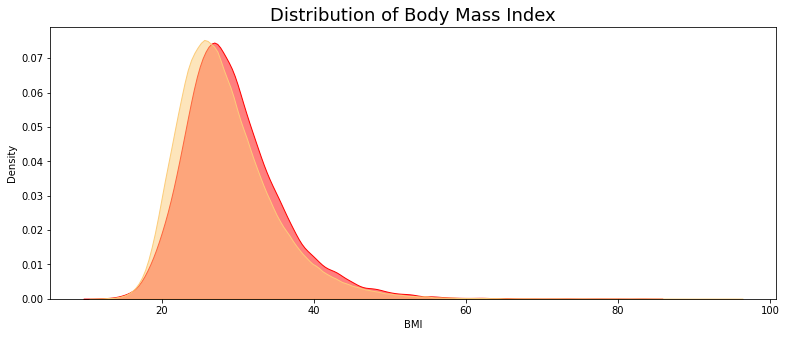

In [40]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
plt.show()

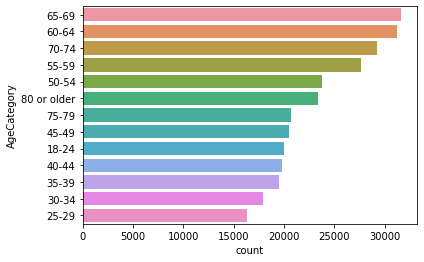

In [41]:
sns.countplot(y = "AgeCategory", data = df, order = df['AgeCategory'].value_counts().index)

In [43]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,2,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,2,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,2,8.0,0,0,0


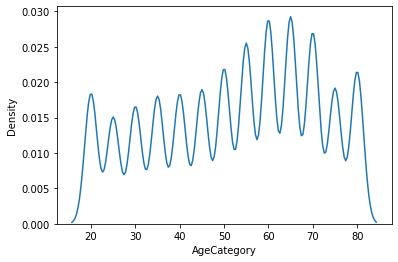

In [44]:
sns.kdeplot(x = df['AgeCategory'])

0.9999999999999999

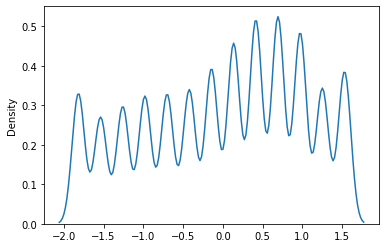

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age = scaler.fit_transform(df['AgeCategory'].values.reshape(-1, 1))
age = age.reshape(301717)
sns.kdeplot(x = age)
np.std(age)

0         1.386294
1         0.000000
2         3.044522
3         0.000000
4         3.367296
            ...   
319790    2.079442
319791    0.000000
319792    0.000000
319793    0.000000
319794    0.000000
Name: PhysicalHealth, Length: 301717, dtype: float64

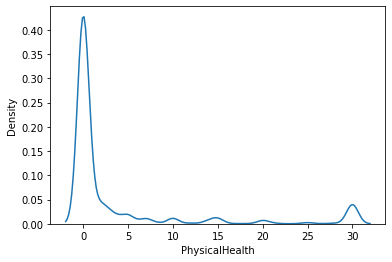

In [69]:
sns.kdeplot(x = df['PhysicalHealth'])
physical = np.log1p(df['PhysicalHealth'])
physical

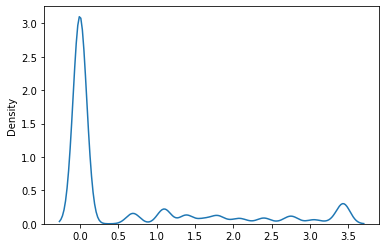

In [70]:
physical = np.log1p(df['PhysicalHealth'])
sns.kdeplot(physical.values)

In [ ]:
'''correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(df.drop(['Race'], axis = 1).astype(float).corr(), annot = True)
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()'''

"correlation = df.corr().round(2)\nplt.figure(figsize = (14,7))\nsns.heatmap(df.drop(['Race'], axis = 1).astype(float).corr(), annot = True)\nplt.figure(figsize = (13,6))\nplt.title('Distribution of correlation of features')\nabs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()\nplt.show()"

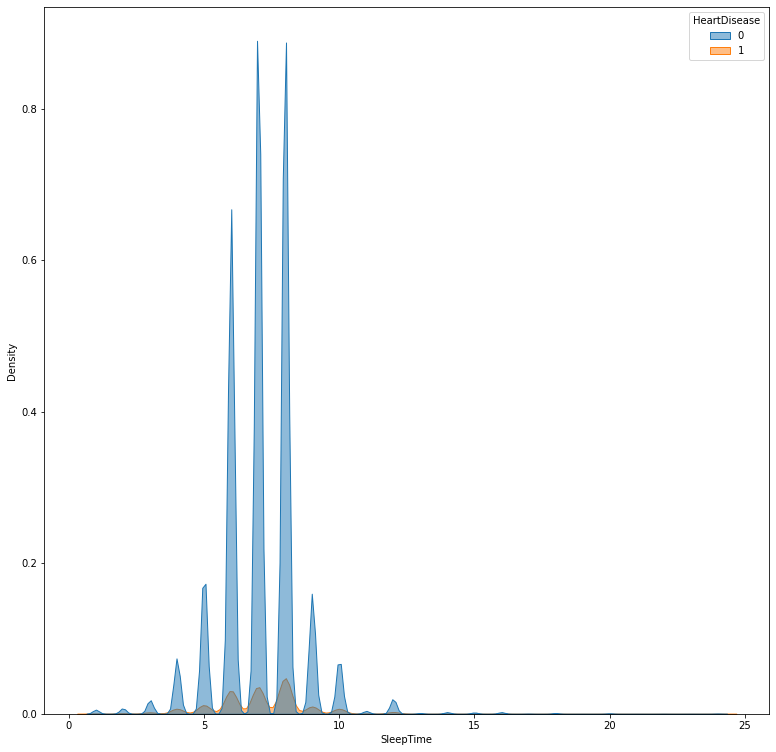

In [ ]:
plt.figure(figsize = (13, 13))
sns.kdeplot(x = df['SleepTime'], hue = df['HeartDisease'], alpha = 0.5, shade = True)

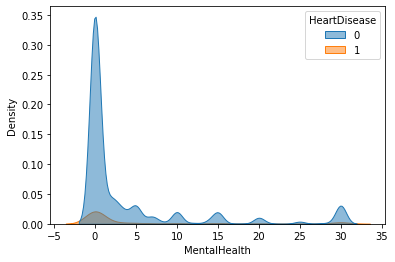

In [ ]:
sns.kdeplot(x = df['MentalHealth'], hue = df['HeartDisease'], shade = True, alpha = 0.5)

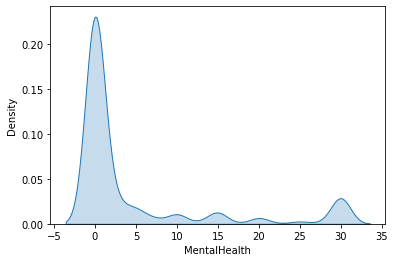

In [ ]:
sns.kdeplot(x = "MentalHealth", data = df[df['HeartDisease'] == 1], shade =True)

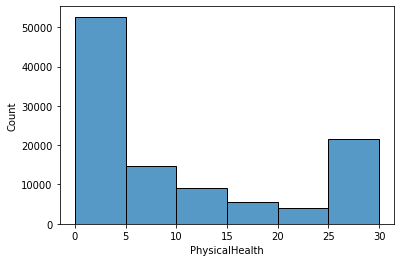

In [ ]:
sns.histplot(x = "PhysicalHealth", data = df[(df['HeartDisease'] == 1) | (df['PhysicalHealth'] > 0)], binwidth = 5)

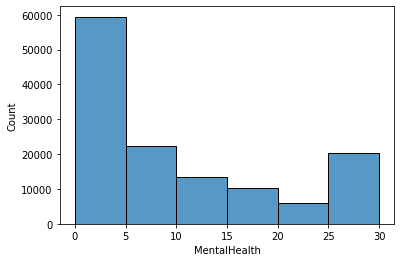

In [ ]:
sns.histplot(x = "MentalHealth", data = df[(df['HeartDisease'] == 1) | (df['MentalHealth'] > 0)], binwidth = 5)

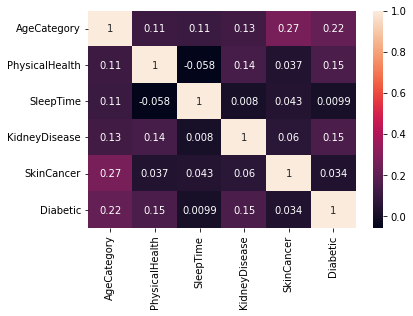

In [ ]:
sns.heatmap(df[['AgeCategory', 'PhysicalHealth', 'SleepTime', 'KidneyDisease', 'SkinCancer', 'Diabetic']].corr(), annot = True)

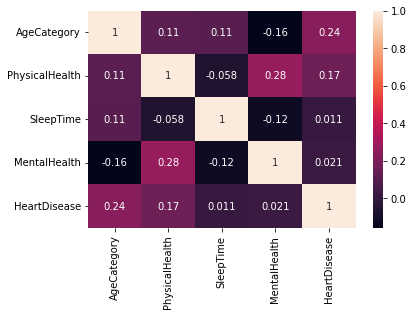

In [ ]:
numerical_columns = ['AgeCategory', 'PhysicalHealth', 'SleepTime', 'MentalHealth']
df_numerical = pd.DataFrame(df[numerical_columns], columns = numerical_columns)
df_numerical = df_numerical.join(df['HeartDisease'])
sns.heatmap(df_numerical.iloc[:, 0:].corr(), annot=True)

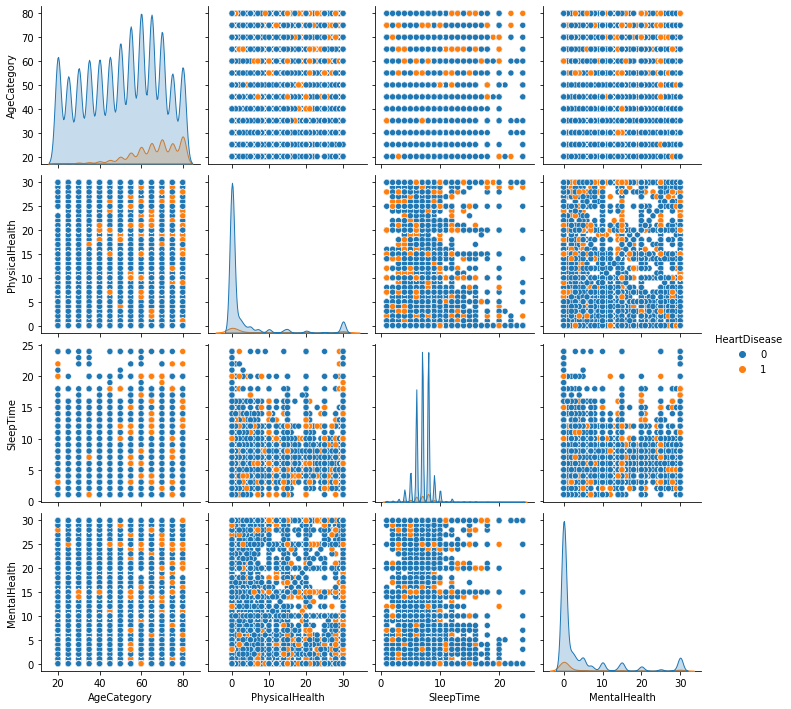

In [ ]:
sns.pairplot(df_numerical, hue='HeartDisease')

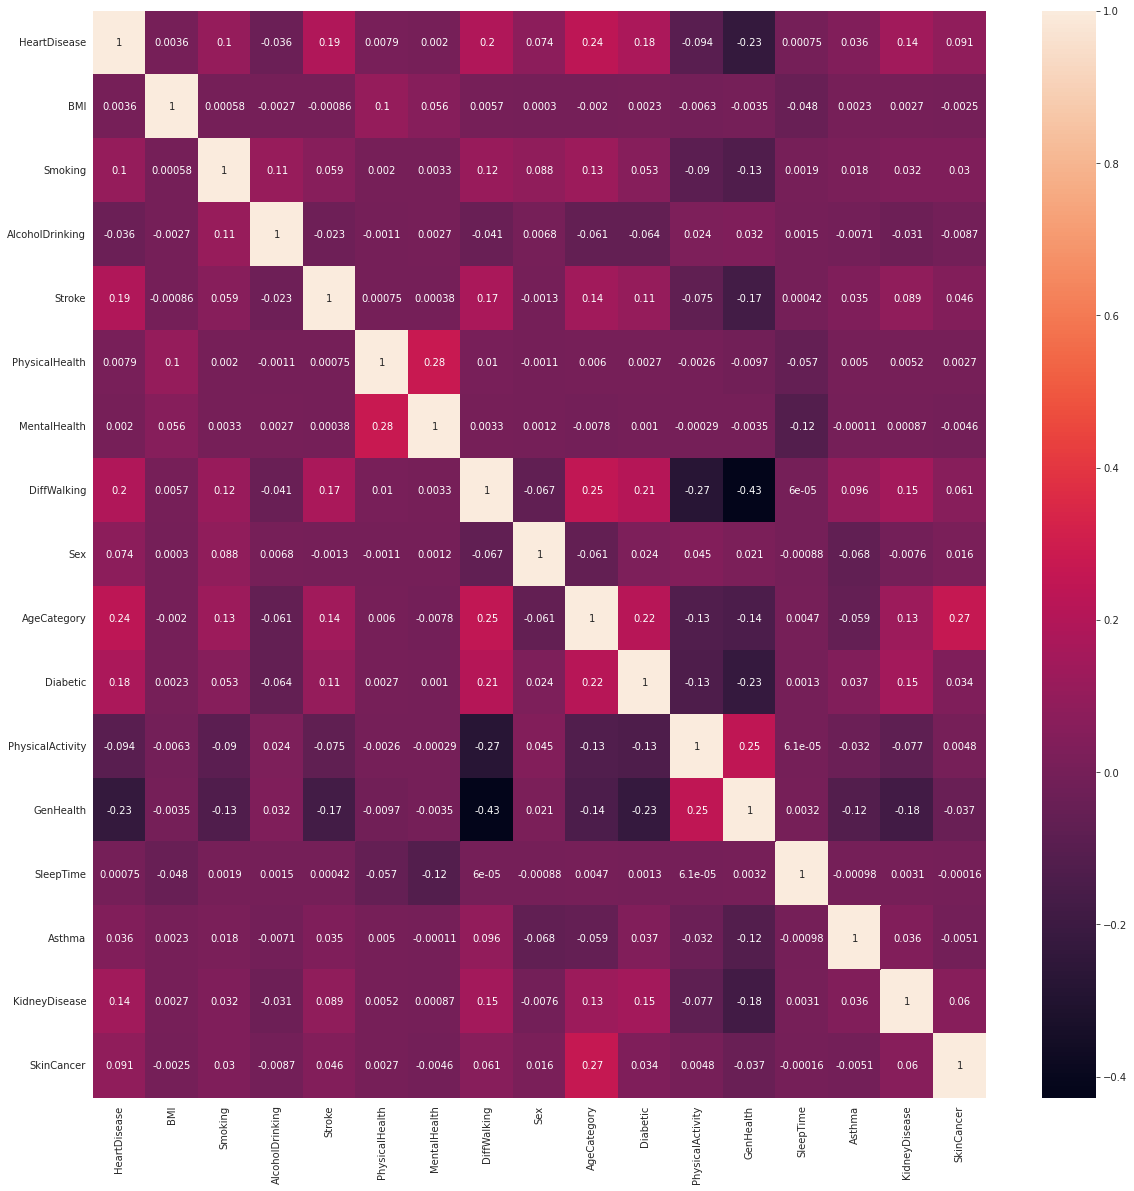

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.drop(['Race'], axis = 1).corr(), annot = True)

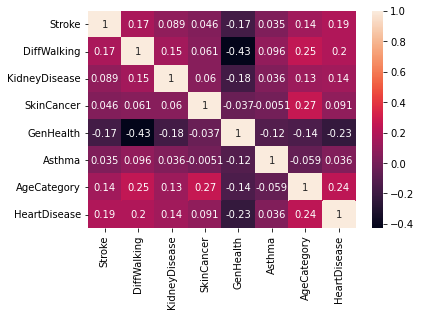

In [ ]:
sns.heatmap(df[['Stroke', 'DiffWalking', 'KidneyDisease', 'SkinCancer', 'GenHealth', 'Asthma', 'AgeCategory', 'HeartDisease']].astype(float).corr(), annot= True)

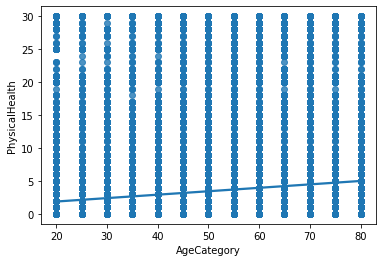

In [139]:
sns.regplot(x = df['AgeCategory'], y = df['PhysicalHealth'])

Text(0.5, 1.0, 'PhysicalHealth - percentage')

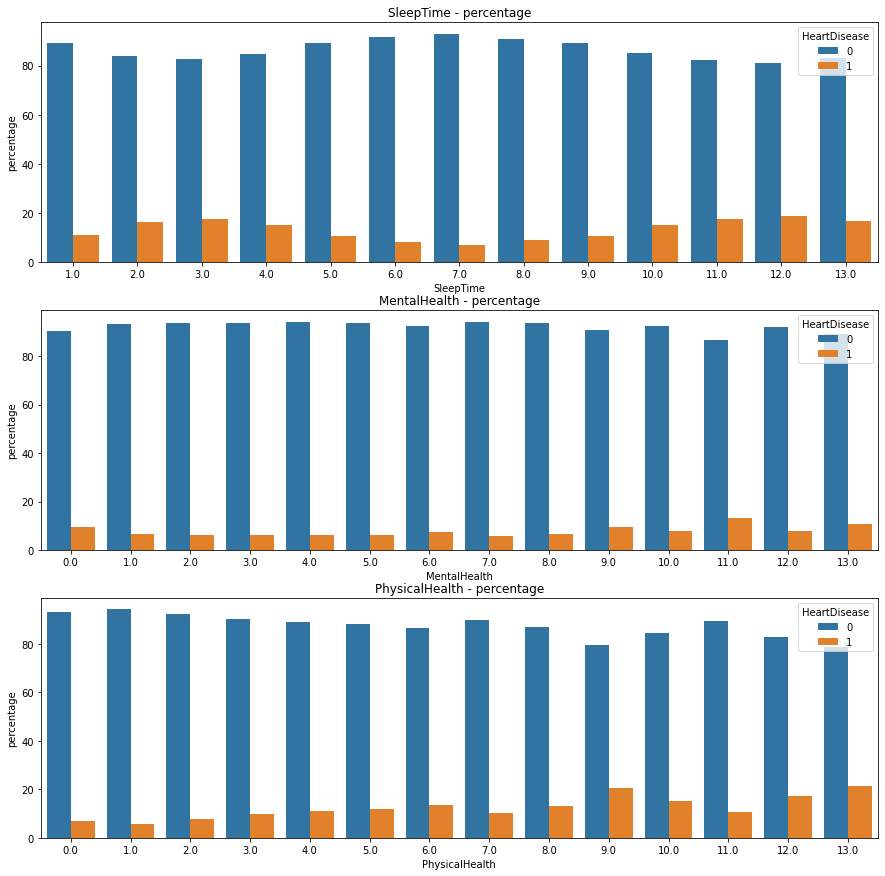

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 15))
occupation_counts = sleeptime_df.groupby('SleepTime')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'SleepTime', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[0])
axes[0].set_title('SleepTime ' + '- percentage')

occupation_counts = mentaltime_df.groupby('MentalHealth')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'MentalHealth', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[1])
axes[1].set_title('MentalHealth ' + '- percentage')

occupation_counts = physicaltime_df.groupby('PhysicalHealth')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'PhysicalHealth', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[2])
axes[2].set_title('PhysicalHealth ' + '- percentage')

In [ ]:
sleeptime_df = df[['SleepTime', 'HeartDisease']]
sleeptime_df.loc[sleeptime_df['SleepTime'] > 12, 'SleepTime'] = 13

mentaltime_df = df[['MentalHealth', 'HeartDisease']]
mentaltime_df.loc[mentaltime_df['MentalHealth'] > 12, 'MentalHealth'] = 13

physicaltime_df = df[['PhysicalHealth', 'HeartDisease']]
physicaltime_df.loc[physicaltime_df['PhysicalHealth'] > 12, 'PhysicalHealth'] = 13

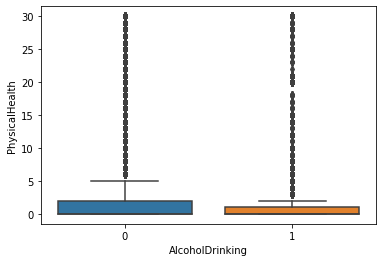

In [129]:
sns.boxplot(x = df['AlcoholDrinking'], y = df['PhysicalHealth'])

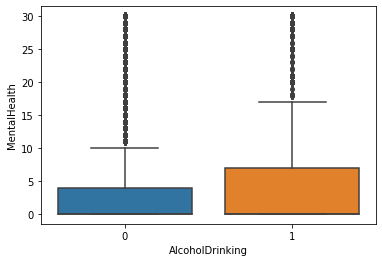

In [130]:
sns.boxplot(x = df['AlcoholDrinking'], y = df['MentalHealth'])

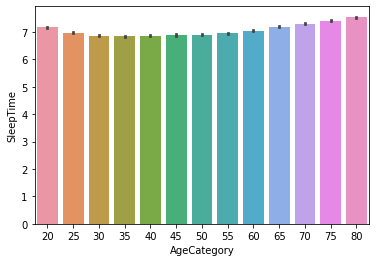

In [135]:
sns.barplot(x = df['AgeCategory'], y = df['SleepTime'])

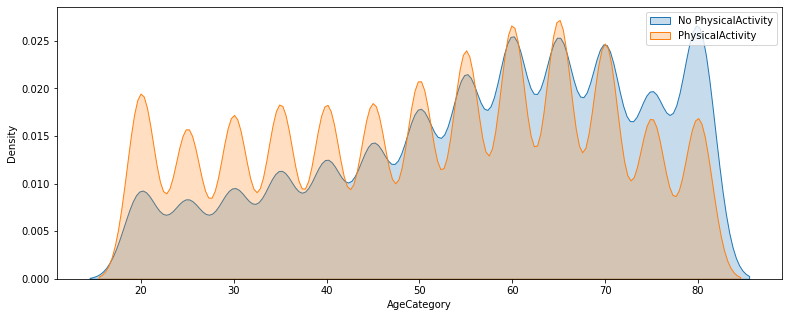

In [143]:
plt.figure(figsize=(13,5))
sns.kdeplot(df[df["PhysicalActivity"]== 0]["AgeCategory"], shade=True, label = 'No PhysicalActivity')
sns.kdeplot(df[df["PhysicalActivity"]== 1]["AgeCategory"], shade=True, label = 'PhysicalActivity')
plt.legend()

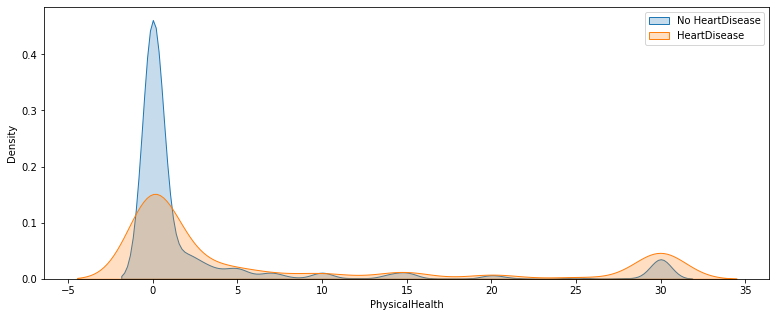

In [145]:
plt.figure(figsize=(13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["PhysicalHealth"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df[df["HeartDisease"]== 1]["PhysicalHealth"], shade=True, label = 'HeartDisease')
plt.legend()

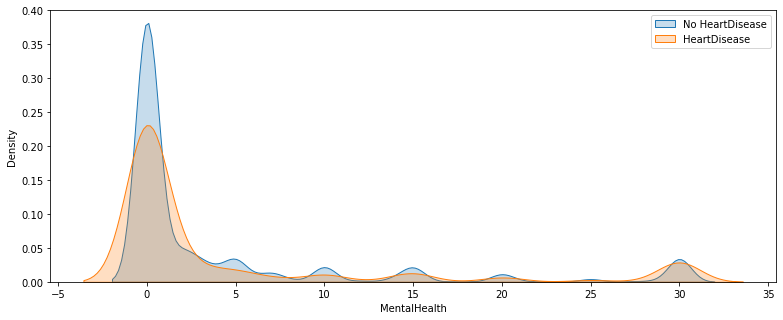

In [146]:
plt.figure(figsize=(13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["MentalHealth"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df[df["HeartDisease"]== 1]["MentalHealth"], shade=True, label = 'HeartDisease')
plt.legend()

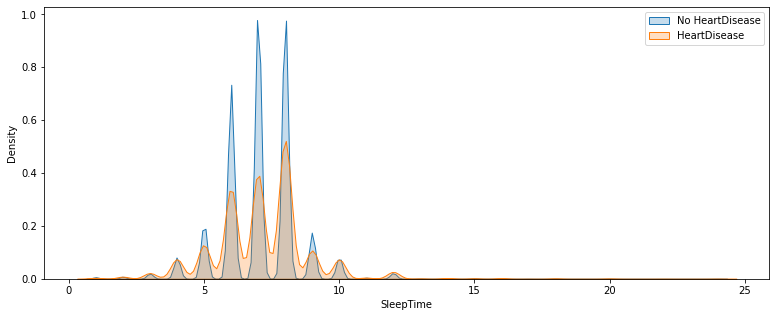

In [147]:
plt.figure(figsize=(13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["SleepTime"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df[df["HeartDisease"]== 1]["SleepTime"], shade=True, label = 'HeartDisease')
plt.legend()

In [149]:
df['SleepTime'].value_counts()

8.0     90202
7.0     89445
6.0     64655
5.0     19101
9.0     15853
10.0     7782
4.0      7730
12.0     2204
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

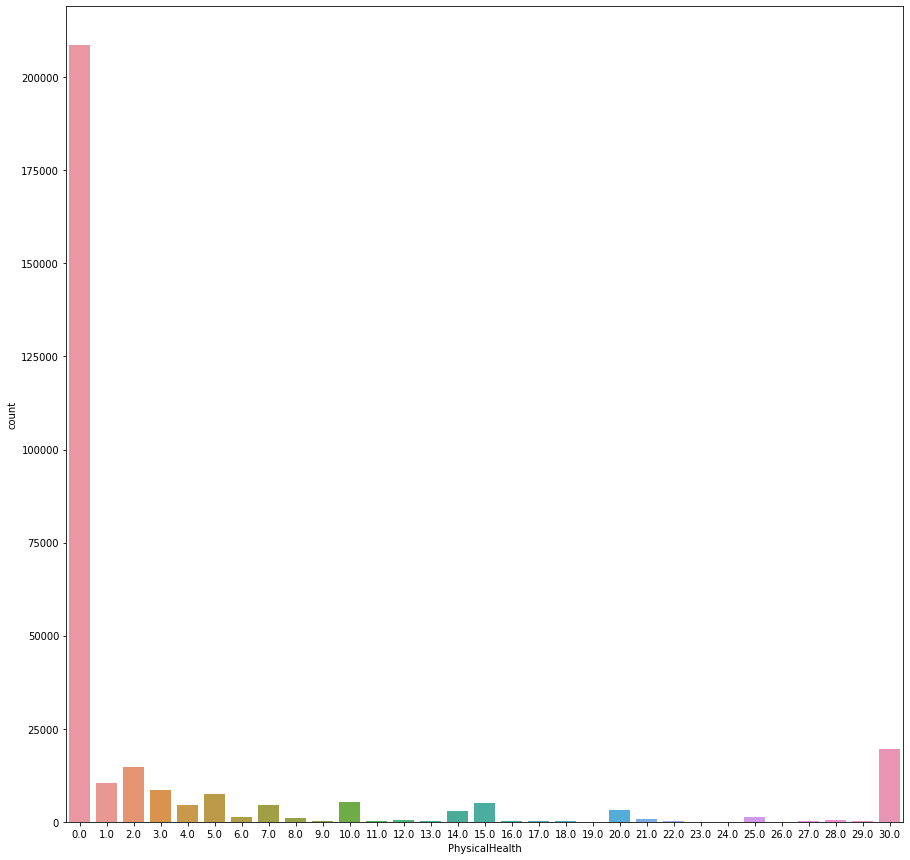

In [162]:
plt.figure(figsize = (15, 15))
sns.countplot(x = df['PhysicalHealth'])

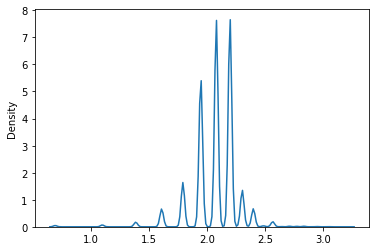

In [157]:
sleep = np.log1p(df['SleepTime'].values)
sns.kdeplot(x = sleep)